# Simple Linear Regression

See: https://en.wikipedia.org/wiki/Simple_linear_regression
        
See: http://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

Underlying linear relationship between x and y:
$$y = mx + b$$

Actual data for x and y with errors:
$$y_i = mx_i + b + \epsilon_i$$

$$\epsilon_i = y_i -(mx_i + b)$$

Sum of squared errors (SSE):
$$SSE = \sum_{i=1}^{N}{\epsilon_i^2}$$

$$SSE = \sum_{i=1}^{N}{(y_i-(mx_i+b))^2}$$

Find m and b that minimize SSE:
$$\frac{\partial}{\partial b} SSE = \frac{\partial}{\partial b} \sum_{i=1}^{N}{(y_i-(mx_i+b))^2} = 0$$

and

$$\frac{\partial}{\partial m} SSE = \frac{\partial}{\partial m} \sum_{i=1}^{N}{(y_i-(mx_i+b))^2} = 0$$

Using the chain rule:
$$\frac{\partial}{\partial b} SSE = -2 \sum_{i=1}^{N}{(y_i - mx_i - b)} = 0$$

and

$$\frac{\partial}{\partial m} SSE = -2 \sum_{i=1}^{N}{(x_iy_i - mx_i^2 - bx_i)} = 0$$

Which results in:
$$b = \frac{\sum_{i=1}^{N}{y_i} - m\sum_{i=1}^{N}{x_i}}{N}$$

and

$$m = \frac{\sum_{i=1}^{N}{x_iy_i}-b\sum_{i=1}^{N}{x_i}}{\sum_{i=1}^{N}{x_i^2}}$$

Substituting for b:

$$m = \frac{N\sum_{i=1}^{N}{x_iy_i} - (\sum_{i=1}^{N}{x_i})(\sum_{i=1}^{N}{y_i})}{N\sum_{i=1}^{N}{x_i^2} - (\sum_{i=1}^{N}{x_i})^2}$$


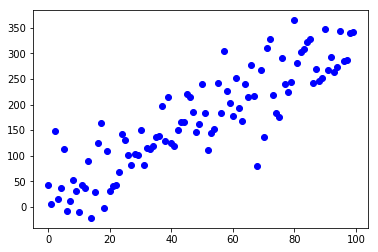

In [17]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)
N = 100
x = np.arange(0, N)
m = 3
b = 20
y_pure = m*x + b

mu, sigma = 0, 50 # mean and standard deviation

error = np.random.normal(mu, sigma, N)
y = y_pure + error

fig = plt.figure()
plt.plot(x, y, "o", color="blue")
plt.show()

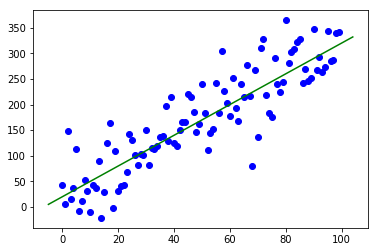

Actual slope m:
 3
Actual intercept b:
 20


In [18]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color="green")

fig = plt.figure()
plt.plot(x, y, "o", color="blue")
abline(m, b)
plt.show()

print('Actual slope m:\n', m)
print('Actual intercept b:\n', b)

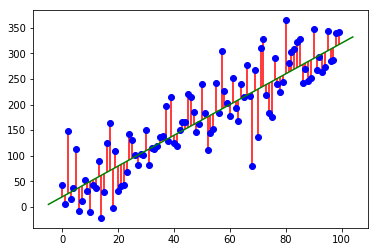

Mean Squared Error (MSE):
 2187.74602483


In [19]:
fig = plt.figure()
plt.plot(x, y, "o", color="blue")
abline(m, b)
plt.vlines(x, y, y_pure, color="red")
plt.show()

MSE = np.sum(np.square(y - (m*x + b)))/N
print("Mean Squared Error (MSE):\n", MSE)

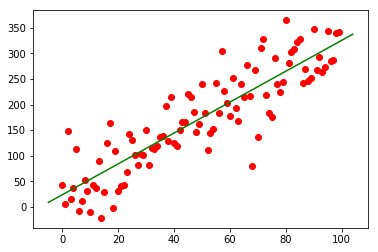

Closed form solution estimated slope mhat: 
 3.0133591012
Closed form solution estimated intercept bhat: 
 23.9160566839


In [20]:
# closed form solution

mhat = (N*np.sum(x*y) - (np.sum(x)*np.sum(y))) / (N*np.sum(x**2) - (np.sum(x)**2))
bhat= (np.sum(y) - mhat*np.sum(x))/N

fig = plt.figure()
plt.plot(x, y, "o", color="red")
abline(mhat, bhat)
plt.show()

print('Closed form solution estimated slope mhat: \n', mhat)
print('Closed form solution estimated intercept bhat: \n', bhat)

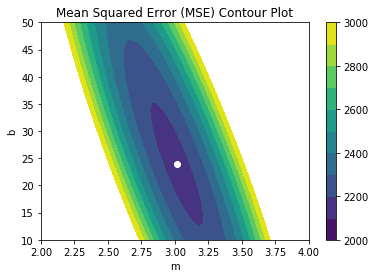

Closed form solution estimated slope mhat: 
 3.0133591012
Closed form solution estimated intercept bhat: 
 23.9160566839
Mean Squared Error (MSE):
 2187.74602483


In [21]:
mlist = np.linspace(2.0, 4.0, 100)
blist = np.linspace(10, 50.0, 100)
M, B = np.meshgrid(mlist, blist)
Z = np.zeros((100, 100))
for i in range(0, 100):
    for j in range(0, 100):
        Z[i, j] = np.sum(np.square(y - (M[i,j]*x + B[i,j])))/N

plt.figure()
levels = [2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000]
cp = plt.contourf(M, B, Z, levels)
plt.colorbar(cp)
plt.plot(mhat, bhat, "o", color="white")
plt.title('Mean Squared Error (MSE) Contour Plot')
plt.xlabel('m')
plt.ylabel('b')
plt.show()

print('Closed form solution estimated slope mhat: \n', mhat)
print('Closed form solution estimated intercept bhat: \n', bhat)
print("Mean Squared Error (MSE):\n", MSE)

Gradient descent estimated slope mest:
 3.04
Gradient descent estimated intercept best:
 22.1
Gradient descent final MSE:
 2167.76409151


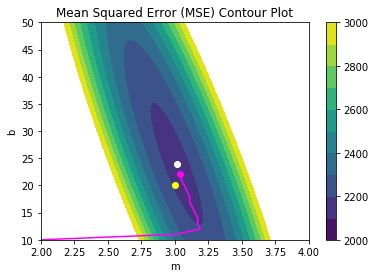

In [22]:
# gradient descent
# this code is an extremely simplified and crude implementation for demonstration brevity and clarity
# proper implementation would be more efficient, faster, more accurate, and much more complex
# but it shows the basic concept of gradient descent
# for more detailed information see https://en.wikipedia.org/wiki/Gradient_descent

mest = 2
best = 10
step = 0.01
numIterations = 1500
msteps = []
bsteps = []
for i in range(0, numIterations):
    MSE = np.sum(np.square(y - (mest*x + best)))/N
    dbest = -2*np.sum(y - mest*x - best)
    dmest = -2*np.sum(x*y - mest*x**2 - best*x)
    mest -= step*np.sign(dmest)
    best -= step*np.sign(dbest)
    if i % 100 == 0:
        msteps.append(mest)
        bsteps.append(best)
        
print("Gradient descent estimated slope mest:\n", mest)
print("Gradient descent estimated intercept best:\n", best)
print("Gradient descent final MSE:\n", MSE)

plt.figure()
levels = [2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000]
cp = plt.contourf(M, B, Z, levels)
plt.colorbar(cp)
plt.plot(mhat, bhat, "o", color="white")
plt.plot(msteps, bsteps, color="magenta")
plt.plot(mest, best, "o", color="magenta")
plt.plot(m, b, "o", color="yellow")
plt.title('Mean Squared Error (MSE) Contour Plot')
plt.xlabel('m')
plt.ylabel('b')
plt.show()

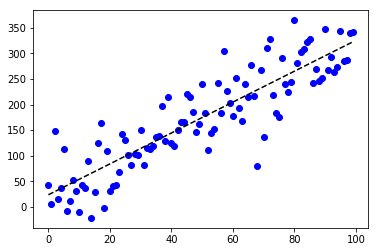

sklearn estimated slope m: 
 [ 3.0133591]
sklearn estimated intercept b:
 23.9160566839
sklearn estimated Mean Squared Error (MSE):
 2166.64534838


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regr = linear_model.LinearRegression()
x_ = x.reshape(-1, 1)
regr.fit(x_, y)
y_pred = regr.predict(x_)

fig = plt.figure()
plt.plot(x, y, "o", color="blue")
plt.plot(x, y_pred, 'k--')

plt.show()

print('sklearn estimated slope m: \n', regr.coef_)
print('sklearn estimated intercept b:\n', regr.intercept_)
print("sklearn estimated Mean Squared Error (MSE):\n", mean_squared_error(y, y_pred))